In [1]:
!ls
!rm -rf *

In [2]:
!nvidia-smi

Sun Sep 21 07:58:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [ ]:
import torch
print(torch.__version__)  # Should print 2.6.0+cu124
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should print 2
print(torch.cuda.get_device_name(0))  # Should print Tesla T4
print(torch.cuda.get_device_name(1))  # Should print Tesla T4

# Test NMS
from torchvision.ops import nms

# Check installed package versions
!pip list | grep -E "torch|torchvision|torchaudio|ultralytics|roboflow|fsspec|packaging|numpy|matplotlib|scikit-learn|jupyter-client"

In [4]:
# !pip install torch==2.5.1
# !pip install --upgrade --no-cache-dir torchvision==0.20.1+cu124 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -U ultralytics==8.2.103
!pip install -U ray[tune]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 16.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00:00:0100:01
  Attempting u

In [ ]:
# import os
# os._exit(00)  # Restarts Colab runtime

In [ ]:
import torch
import torchvision
print(torch.__version__)  # Should print 2.6.0+cu124
print(torchvision.__version__)  # Should print 0.21.0+cu124
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should print 2
print(torch.cuda.get_device_name(0))  # Should print Tesla T4
print(torch.cuda.get_device_name(1))  # Should print Tesla T4

# Test NMS
from torchvision.ops import nms
# Simple NMS test
boxes = torch.tensor([[0, 0, 10, 10], [1, 1, 11, 11], [0, 0, 5, 5]], dtype=torch.float32, device='cuda')
scores = torch.tensor([0.9, 0.8, 0.7], dtype=torch.float32, device='cuda')
keep = nms(boxes, scores, iou_threshold=0.5)
print("NMS keep indices:", keep)  # Should print tensor with indices of kept boxes

# Check installed package versions
!pip list | grep -E "torch|torchvision|torchaudio|ultralytics|roboflow|fsspec|packaging|numpy|matplotlib|scikit-learn|jupyter-client|thinc"

In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6411.7/8062.4 GB disk)


In [6]:
!yolo settings

JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/kaggle/working/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "1bfc3e992d24318da58ddee183be5bf9388a31f26bab1738e986ec4d297417ff",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 214MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l summary (fused): 268 layers, 43,668,288 parameters, 0 gradients, 165.2 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 48.1MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 2 dogs, 2 backpacks, 60.9ms
Speed: 15.8ms preprocess, 60.9ms inference, 412.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


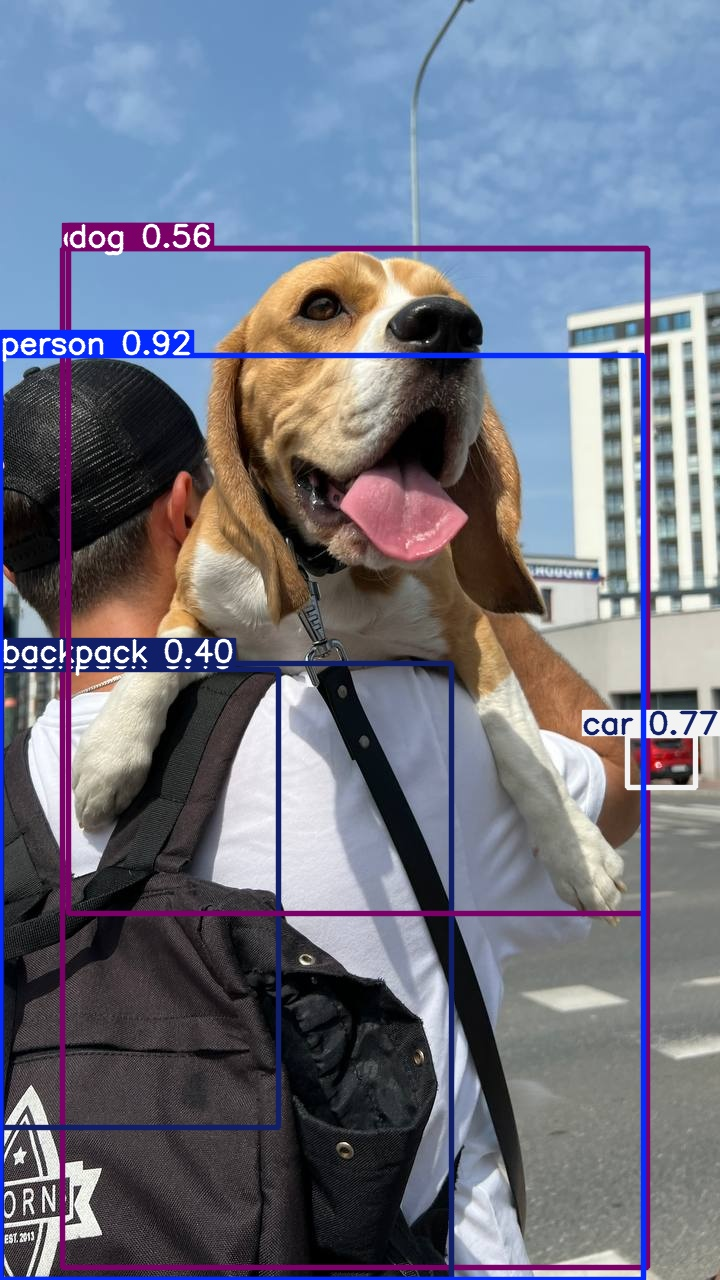

In [9]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
# model = YOLO(f'{HOME}/yolov8l.pt')
# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
# results[0].boxes.xyxy

In [ ]:
# results[0].boxes.conf

In [ ]:
# results[0].boxes.cls

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="n12mRmQdWmrjCSKFgJMC")
project = rf.workspace("waste-detections-by-fu").project("waste-detections-c0mkz")
version = project.version(6)
dataset = version.download("yolov8")

/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.4 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.5.1 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.3 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is in


Extracting Dataset Version Zip to Waste-Detections-6 in yolov8:: 100%|██████████| 14224/14224 [00:02<00:00, 5227.91it/s]


In [ ]:
dataset.location

## Custom Training

In [ ]:
# # Uninstall NumPy and related packages to avoid conflicts
# !pip uninstall -y numpy opencv-python opencv-python-headless scikit-learn-intelex mkl mkl-service mkl_fft mkl_random mkl_umath
# !pip cache purge

# # Install compatible NumPy and OpenCV versions
# !pip install numpy==2.1.0
# !pip install opencv-python==4.10.0.84
# !pip install opencv-python-headless==4.10.0.84  # Already installed for roboflow

In [ ]:
# # !pip show numpy
# !pip uninstall -y numpy
# !pip install numpy==1.22.0


In [ ]:
# !pip uninstall -y ray[tune]
# !pip install ray[tune]==2.3.1


In [11]:
!pip list --outdated

Package                      Version             Latest             Type
---------------------------- ------------------- ------------------ -----
absl-py                      1.4.0               2.3.1              wheel
accelerate                   1.8.1               1.10.1             wheel
aiofiles                     22.1.0              24.1.0             wheel
aiohttp                      3.12.13             3.12.15            wheel
aiosignal                    1.3.2               1.4.0              wheel
albucore                     0.0.24              0.0.33             wheel
ale-py                       0.11.1              0.11.2             wheel
alembic                      1.16.2              1.16.5             wheel
antlr4-python3-runtime       4.9.3               4.13.2             wheel
anyio                        4.9.0               4.10.0             wheel
argon2-cffi-bindings         21.2.0              25.1.0             wheel
array_record                 0.7.2     

In [12]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [14]:
!pip list --outdated --format=json | jq -r '.[] | "\(.name)==\(.latest_version)"'

absl-py==2.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohttp==3.12.15
aiosignal==1.4.0
albucore==0.0.33
ale-py==0.11.2
alembic==1.16.5
antlr4-python3-runtime==4.13.2
anyio==4.10.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arviz==0.22.0
astropy-iers-data==0.2025.9.15.0.37.0
atpublic==6.0.1
bayesian-optimization==3.1.0
beautifulsoup4==4.13.5
bigframes==2.21.0
bigquery-magics==0.10.3
blobfile==3.1.0
blosc2==3.8.0
bokeh==3.8.0
boto3==1.40.35
botocore==1.40.35
Bottleneck==1.6.0
build==1.3.0
cachetools==6.2.0
Cartopy==0.25.0
category_encoders==2.8.1
certifi==2025.8.3
cffi==2.0.0
charset-normalizer==3.4.3
chex==0.1.91
click==8.3.0
cloudpathlib==0.22.0
cmake==4.1.0
comm==0.2.3
cons==0.4.7
contourpy==1.3.3
coverage==7.10.6
cramjam==2.11.0
cryptography==46.0.1
cuda-bindings==13.0.1
cuda-python==13.0.1
cudf-cu12==25.8.0
cudf-polars-cu12==25.8.0
cuml-cu12==25.8.0
cupy-cuda12x==13.6.0
curl_cffi==0.13.0
cuvs-cu12==25.8.0
cvxpy==1.7.2
cyipopt==1.6.1
Cython==3.1.4
daal==2025.8.0
dask==2025.9.1
da

In [ ]:
# !pip install --upgrade 

In [ ]:
# !pip show ray[tuned]

In [15]:
!cat /kaggle/working/datasets/Waste-Detections-6/data.yaml

names:
- Paper
- Plastic Bottle
- Plastic bag
- Plastic waste
nc: 4
roboflow:
  license: CC BY 4.0
  project: waste-detections-c0mkz
  url: https://universe.roboflow.com/waste-detections-by-fu/waste-detections-c0mkz/dataset/6
  version: 6
  workspace: waste-detections-by-fu
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
!cat /usr/local/lib/python3.11/dist-packages/ultralytics/utils/callbacks/raytune.py


In [ ]:
# !mkdir -p /kaggle/working/ultralytics/utils/callbacks

# !chmod -R u+w /kaggle/working/ultralytics
# !ls -l /kaggle/working/ultralytics/utils/callbacks/raytune.py

# # Copy ultralytics to /kaggle/working/
# !cp -r /usr/local/lib/python3.11/dist-packages/ultralytics/utils/callbacks/raytune.py /kaggle/working/ultralytics/utils/callbacks/raytune.py

# # Overwrite raytune.py with modified content
# # echo -e '# Ultralytics YOLO 🚀, AGPL-3.0 license\n\ndef callbacks():\n    """Return an empty dictionary to disable Ray Tune callbacks."""\n    return {}' > /kaggle/working/ultralytics/utils/callbacks/raytune.py
# %cd /kaggle/working/ultralytics/utils/callbacks/

# !ls

# !echo -e '# Ultralytics YOLO 🚀, AGPL-3.0 license\n\nfrom ultralytics.utils import SETTINGS\n\ntry:\n    assert SETTINGS["raytune"] is True  # verify integration is enabled\n    import ray\n    from ray import tune\n    from ray.air import session\n\nexcept (ImportError, AssertionError):\n    tune = None\n\n\ndef on_fit_epoch_end(trainer):\n    """Sends training metrics to Ray Tune at end of each epoch."""\n    if ray.train._internal.session.get_session():  # replacement for deprecated ray.tune.is_session_enabled()\n        metrics = trainer.metrics\n        metrics["epoch"] = trainer.epoch\n        session.report(metrics)\n\n\ncallbacks = (\n    {\n        "on_fit_epoch_end": on_fit_epoch_end,\n    }\n    if tune\n    else {}\n)' > raytune.py

# # Verify the file content
# !cat /kaggle/working/ultralytics/utils/callbacks/raytune.py

# !cp -r /kaggle/working/ultralytics/utils/callbacks/raytune.py /usr/local/lib/python3.11/dist-packages/ultralytics/utils/callbacks/raytune.py

# !cat /usr/local/lib/python3.11/dist-packages/ultralytics/utils/callbacks/raytune.py


In [31]:
!rm -rf /kaggle/working/runs/detect/train
!rm -rf /kaggle/working/runs/detect/predict
!rm -rf /kaggle/working/runs/detect/val

In [ ]:
# # %load /usr/local/lib/python3.11/dist-packages/ultralytics/utils/callbacks/raytune.py
# # Ultralytics YOLO 🚀, AGPL-3.0 license

# from ultralytics.utils import SETTINGS

# try:
#     assert SETTINGS["raytune"] is True  # verify integration is enabled
#     import ray
#     from ray import tune
#     from ray.air import session

# except (ImportError, AssertionError):
#     tune = None


# def on_fit_epoch_end(trainer):
#     """Sends training metrics to Ray Tune at end of each epoch."""
#     if ray.train._internal.session.get_session():  # replacement for deprecated ray.tune.is_session_enabled()
#         metrics = trainer.metrics
#         metrics["epoch"] = trainer.epoch
#         session.report(metrics)


# callbacks = (
#     {
#         "on_fit_epoch_end": on_fit_epoch_end,
#     }
#     if tune
#     else {}
# )


In [18]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s  0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.103
    Uninstalling ultralytics-8.2.103:
      Successfully uninstalled ultralytics-8.2.103


In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 batch=16 imgsz=640 plots=True device=0,1 amp=True save=True

# from ultralytics import YOLO

# model = YOLO("yolov8l.pt")

# model.train(
#     data=f"{dataset.location}/data.yaml",
#     epochs=50,
#     batch=8,
#     imgsz=640,
#     device=[0,1],
#     plots=True,
#     workers=8,
#     cache="disk",
#     deterministic=True
# )



# from ultralytics import YOLO
# import os

# # Set working directory
# os.chdir(HOME)

# # Load pre-trained YOLOv8 large model
# model = YOLO("yolov8l.pt")

# # Train the model
# model.train(
#     data=f"{dataset.location}/data.yaml",  # Use dataset.location for Roboflow or specify path
#     epochs=50,
#     batch=16,  # Balanced for T4x2 (16GB per GPU)
#     imgsz=640,
#     device=[0,1],  # Use both GPUs
#     # workers=8,
#     cache="disk",  # Cache images to disk to reduce memory pressure
#     # deterministic=True,  # Ensure reproducibility
#     # amp=True,  # Automatic mixed precision for faster training
#     plots=True,  # Generate training plots
#     save=True
#     # project="/kaggle/working/runs",  # Save outputs to /kaggle/working/runs
# )

# # Save checkpoint
# model.save("/kaggle/working/runs/yolov8l_checkpoint.pt")

/kaggle/working
WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/datasets/Waste-Detections-6/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=

In [ ]:
# !yolo train resume=True model={HOME}/runs/detect/train/weights/last.pt device=0,1 amp=True

In [32]:
!yolo export model={HOME}/runs/detect/train2/weights/best.pt format=coreml nms=True
# !yolo export model={HOME}/runs/detect/train3/weights/best.pt format=coreml nms=True

Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (83.6 MB)
E0000 00:00:1758455343.423272     442 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758455343.428658     442 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

CoreML: starting export with coremltools 9.0b1...
Converting PyTorch Frontend ==> MIL Ops: 100%|▉| 774/776 [00:00<00:00, 1838.31 o
Running MIL default pipeline: 100%|████████| 95/95 [00:05<00:00, 18.99 passes/s]
Running MIL backend_mlprogram pipeline: 100%|█| 12/12 [00:00<00:00, 66.30 passes
CoreML Pipeline: startin

In [ ]:
# ! yolo train resume model={HOME}/runs/detect/train2/weights/last.pt amp=True

In [21]:
!ls

datasets  dog.jpeg  runs  yolo11n.pt  yolov8l.pt  yolov8n.pt


In [ ]:
# project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train3/")

In [22]:
dataset.version

'6'

In [23]:
!ls {HOME}/runs/detect/train2/

args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch16000.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch16001.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch16002.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


/kaggle/working


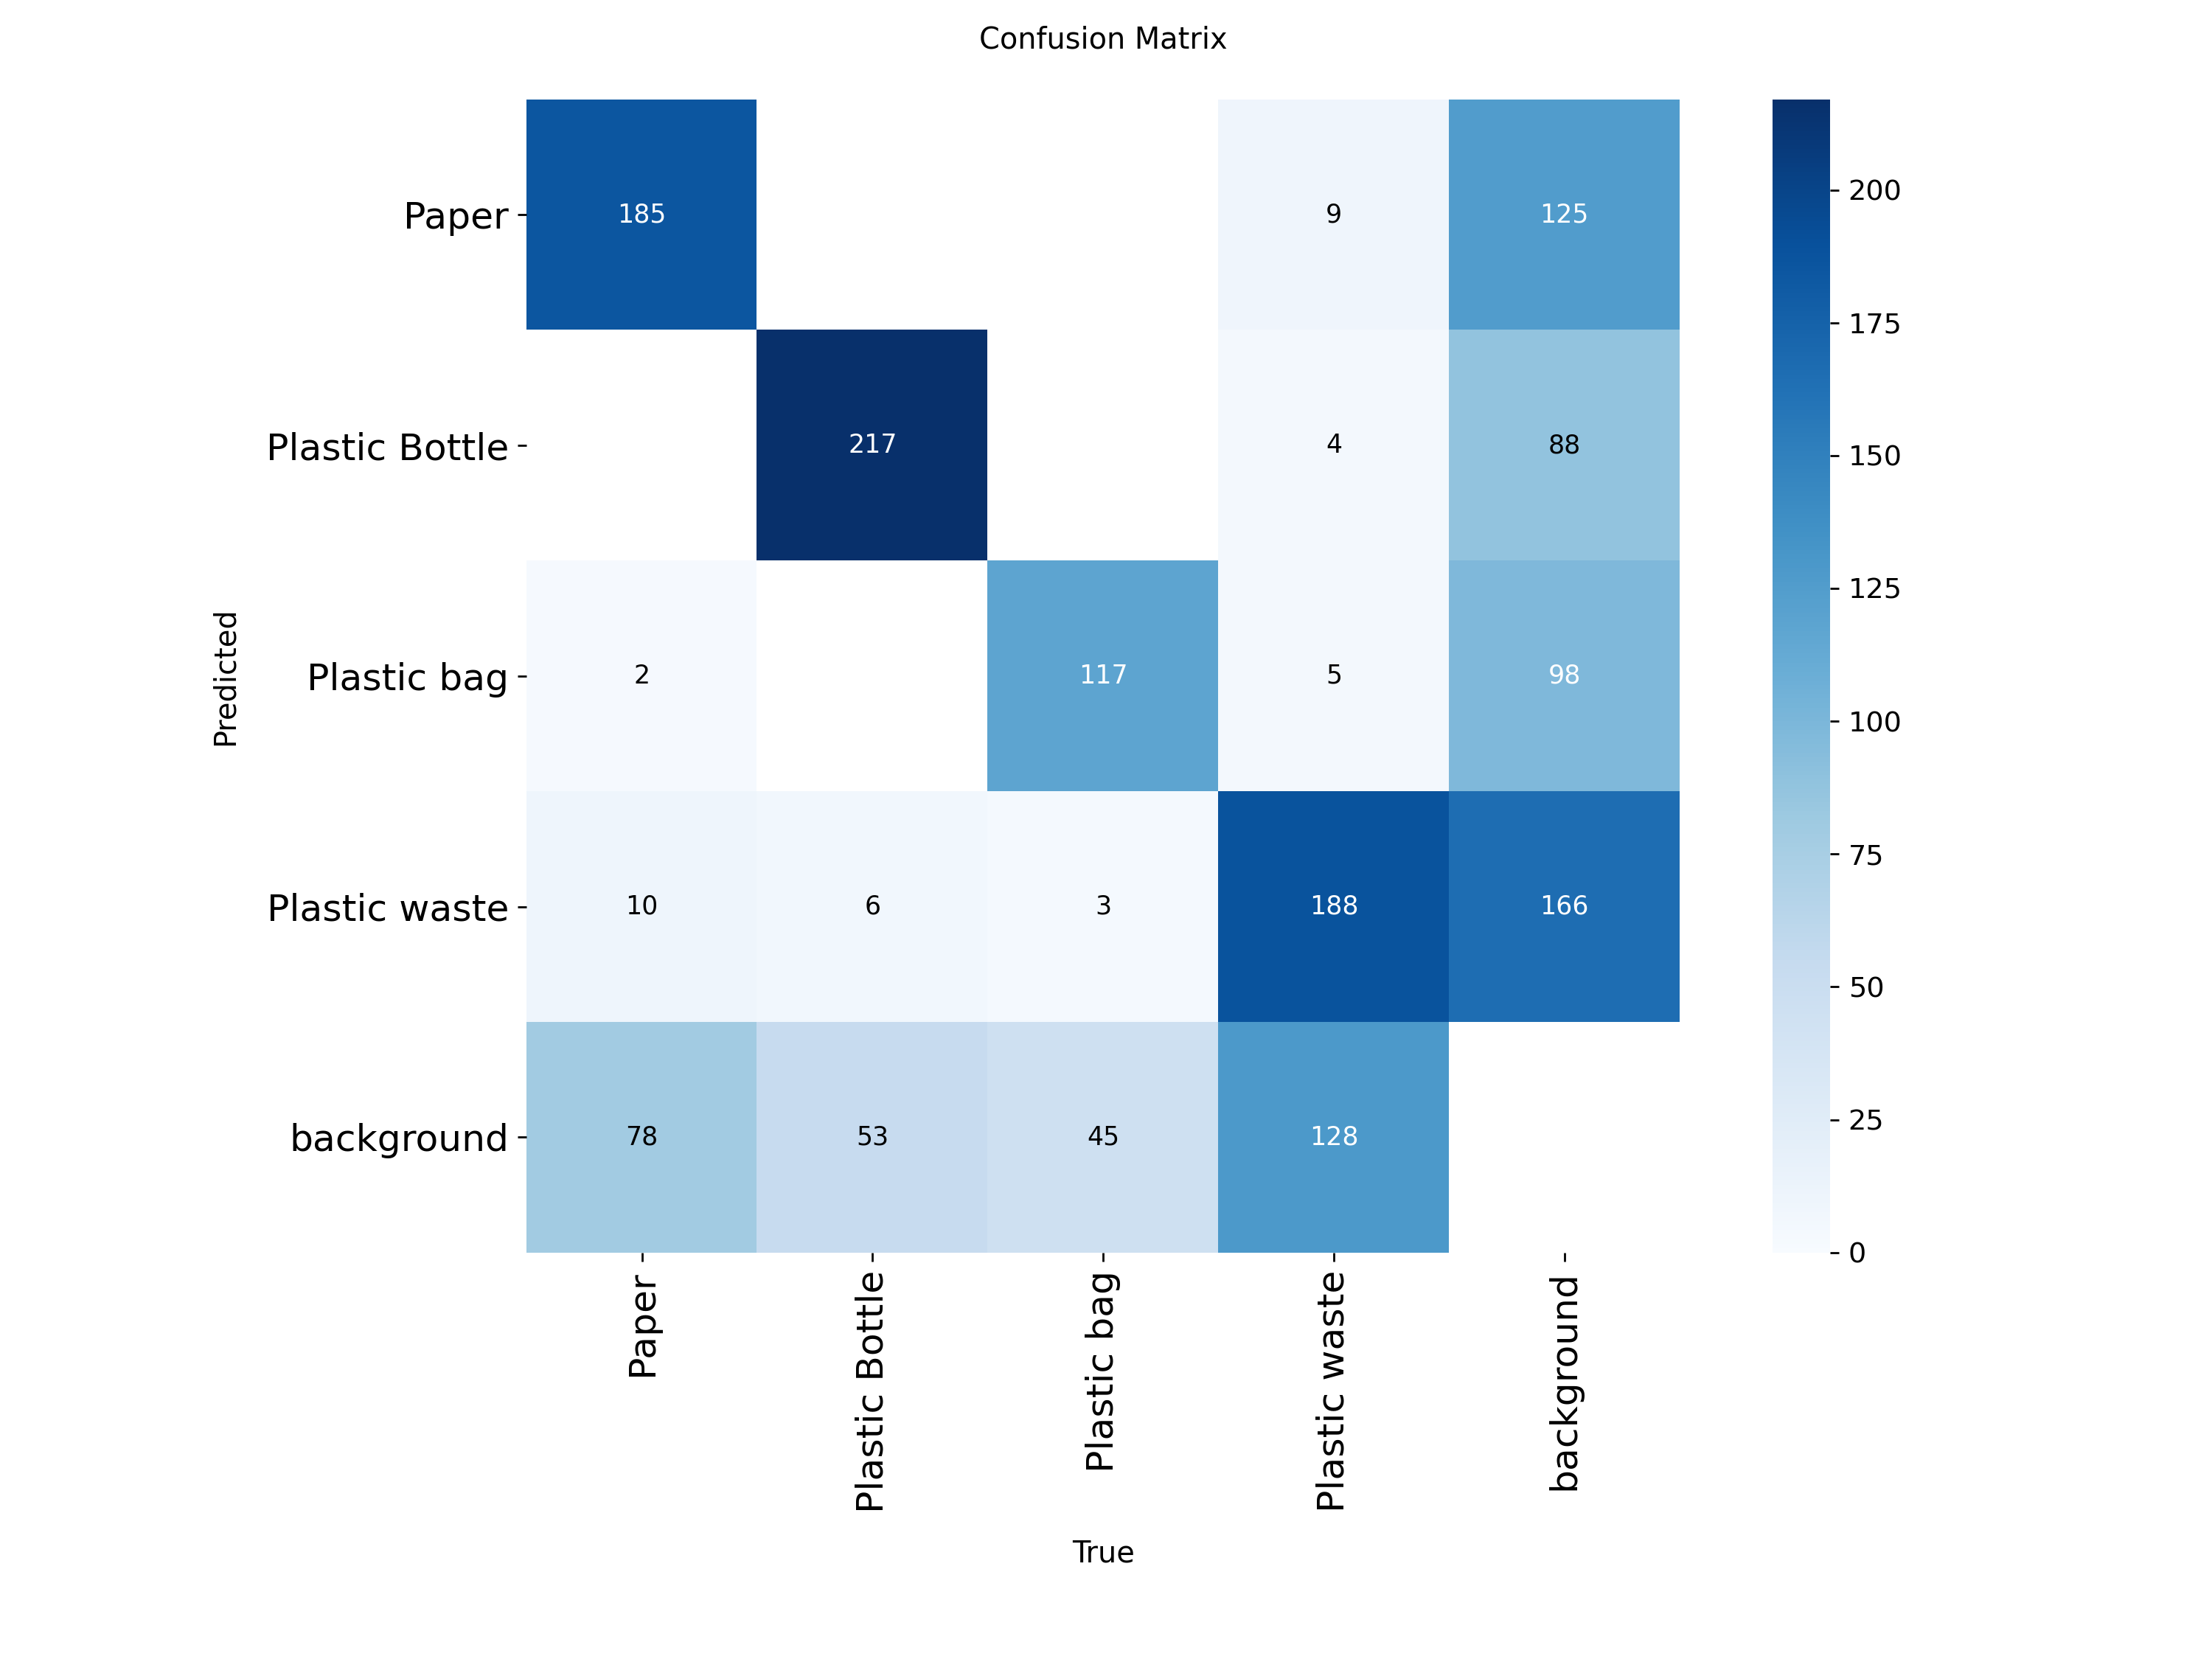

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/kaggle/working


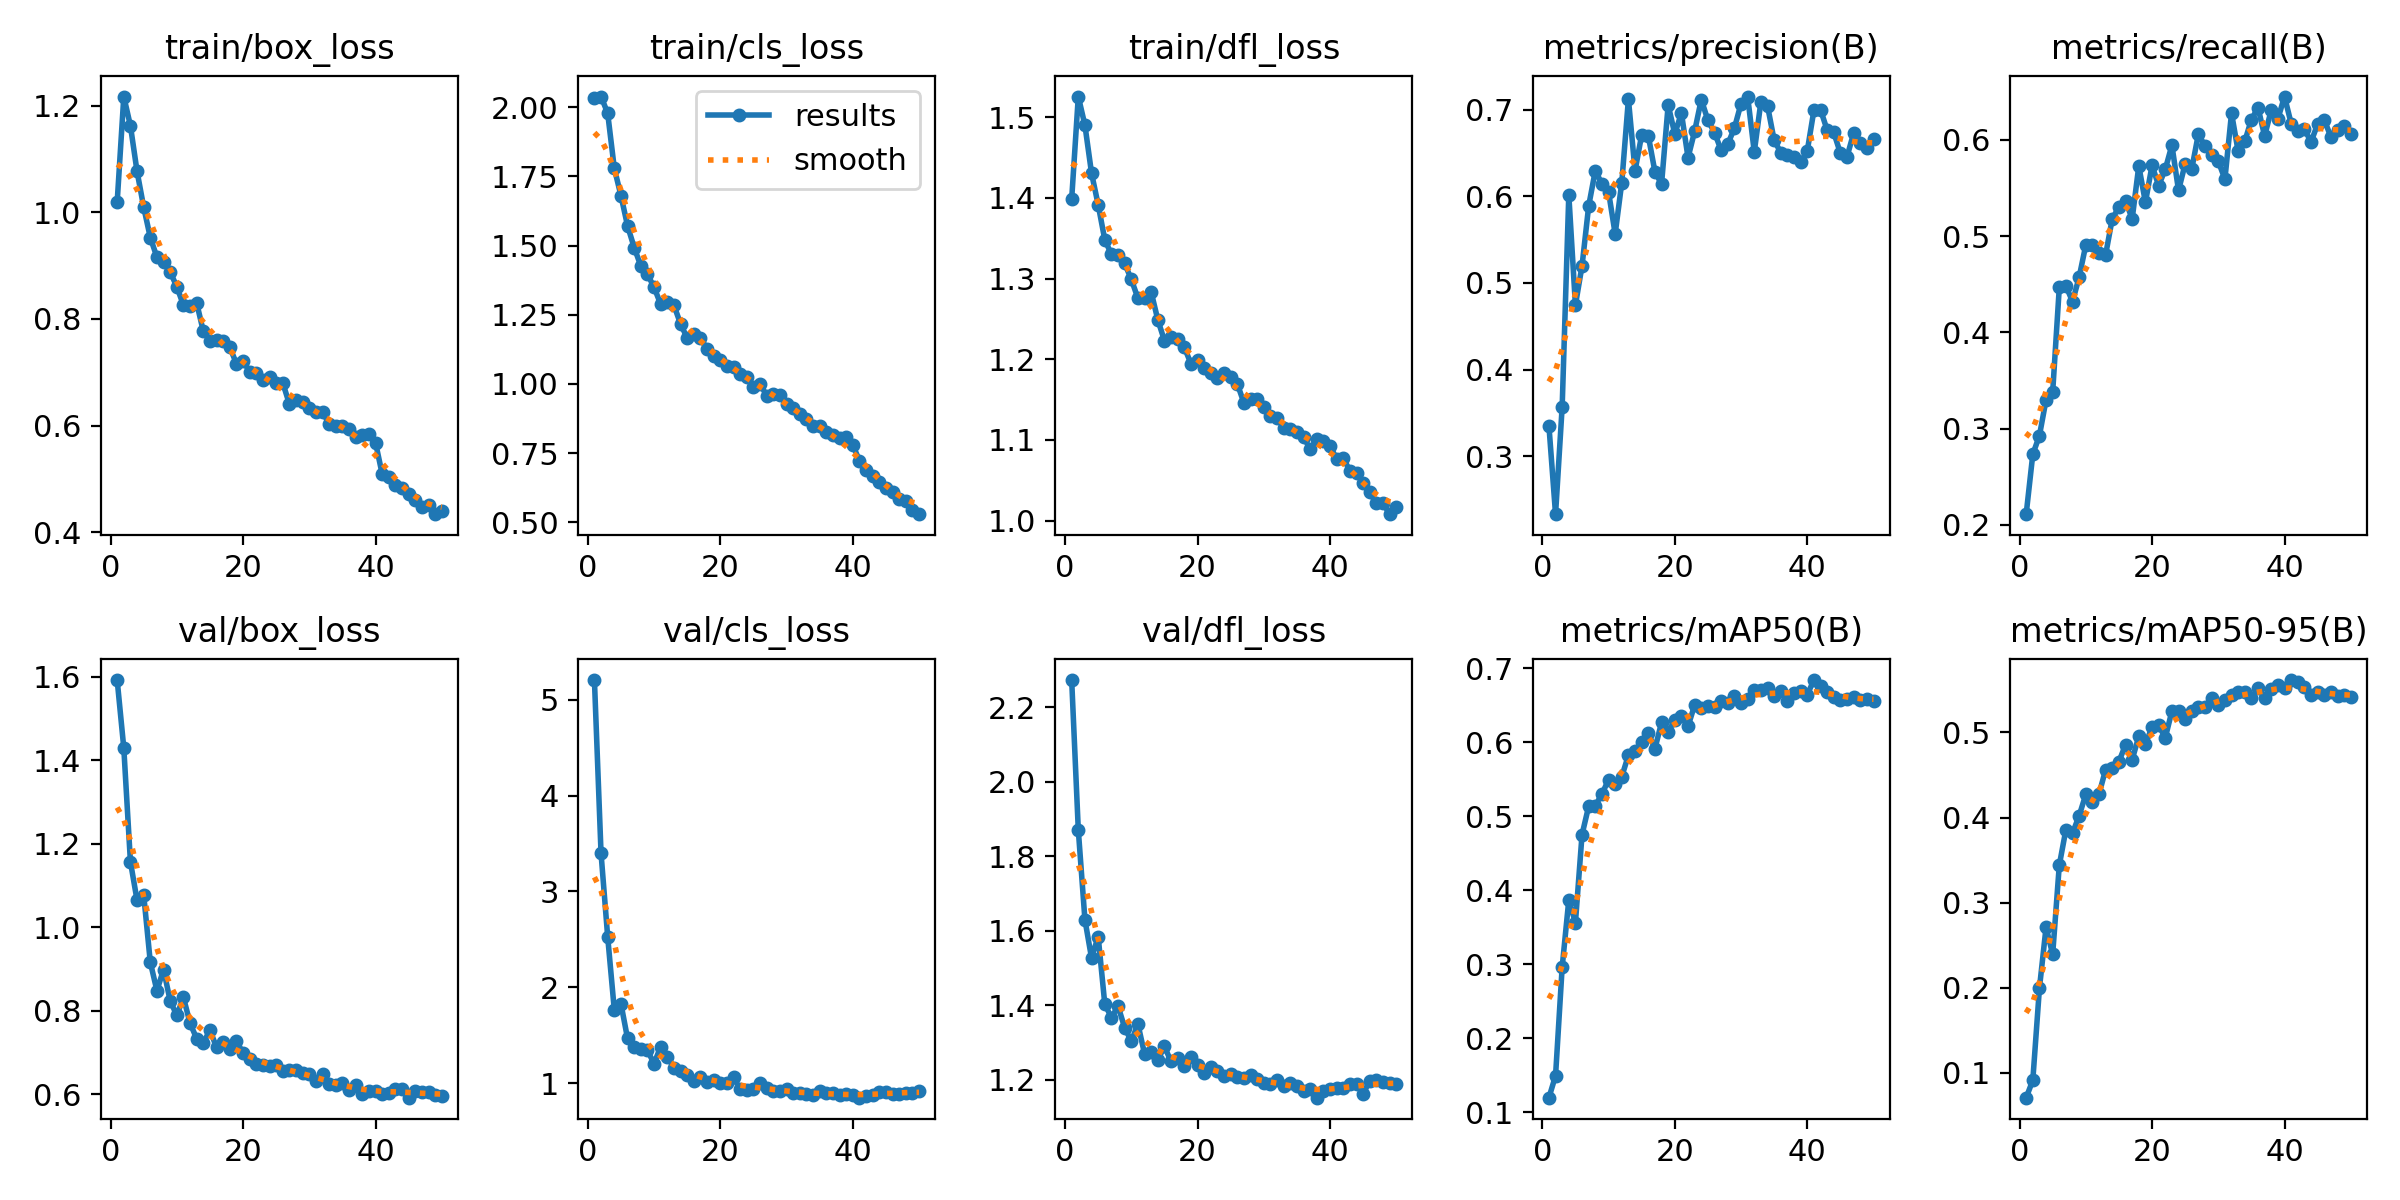

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/kaggle/working


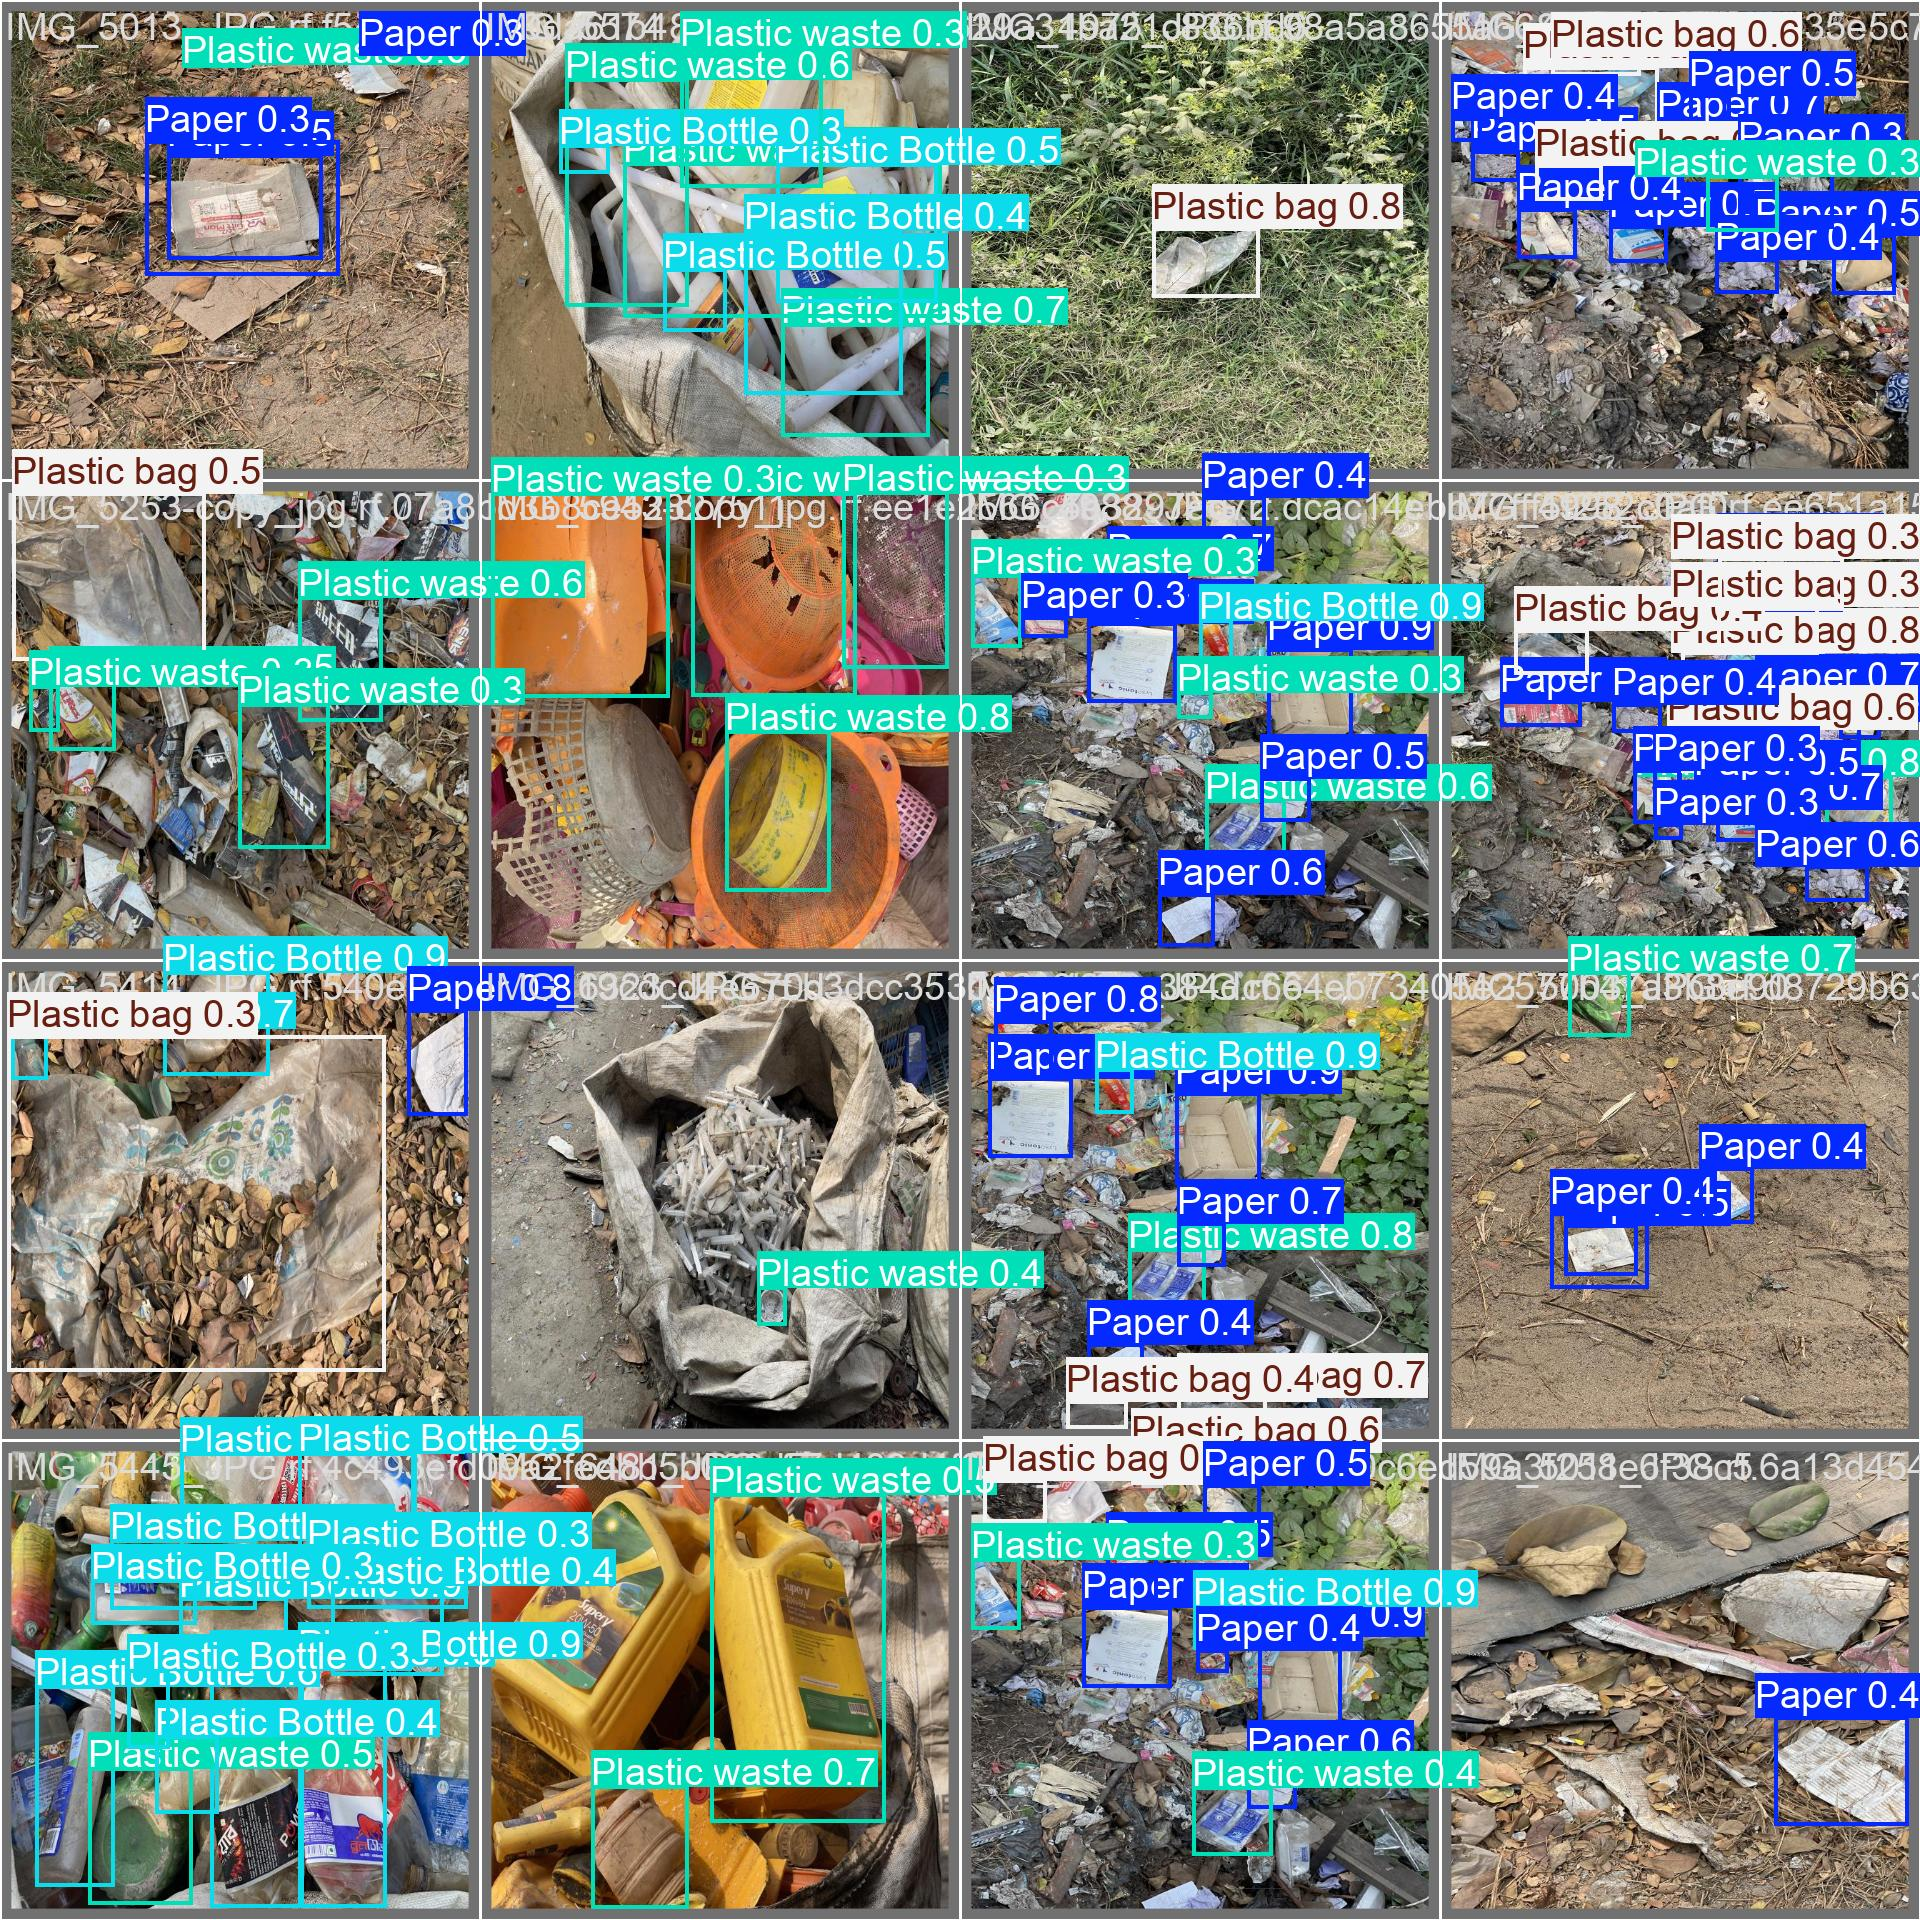

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [28]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2325.2±484.6 MB/s, size: 96.1 KB)
val: Scanning /kaggle/working/datasets/Waste-Detections-6/valid/labels.cache... 427 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 427/427 8.2Mit/s 0.0ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 1.4it/s 18.6s0.7s
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
                   all        427       1050      0.699      0.618      0.684      0.562
                 Paper        151        275      0.757      0.645      0.719      0.

## Inference with Custom Model

In [29]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics 8.3.202 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs

image 1/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141402_jpg.rf.eca6609b65e2645932230f9186be83f4.jpg: 640x640 12 Plastic Bottles, 62.7ms
image 2/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141446_jpg.rf.fff8ddd58bfa68db3ad17b97c8d21949.jpg: 640x640 5 Plastic wastes, 43.2ms
image 3/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141649_jpg.rf.30d1a279399f53b8d35f8567c01d9874.jpg: 640x640 6 Plastic wastes, 43.1ms
image 4/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141652_jpg.rf.f9c3ff2eb28a69c88222dc0a89e4a0ac.jpg: 640x640 3 Plastic wastes, 39.8ms
image 5/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141654_jpg.rf.0a76417ecdcfc7ae4fffb7fa0cdb3d21.jpg: 640x640 6 Plastic wastes, 35.6ms
imag

**NOTE:** Let's take a look at few results.

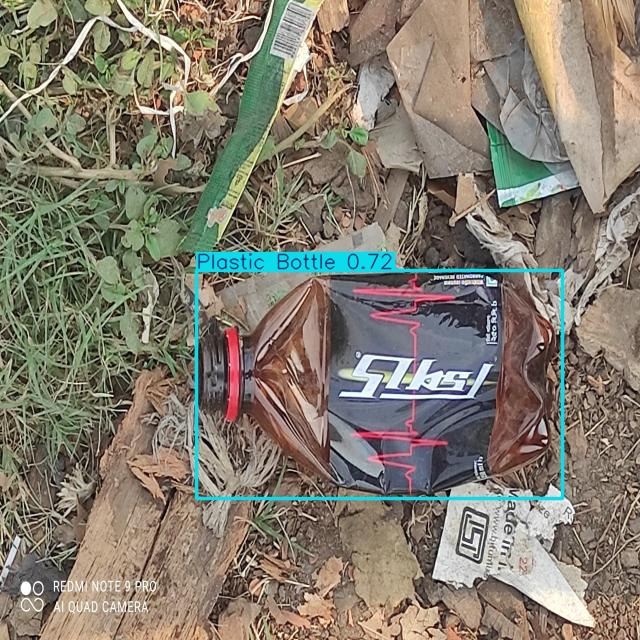

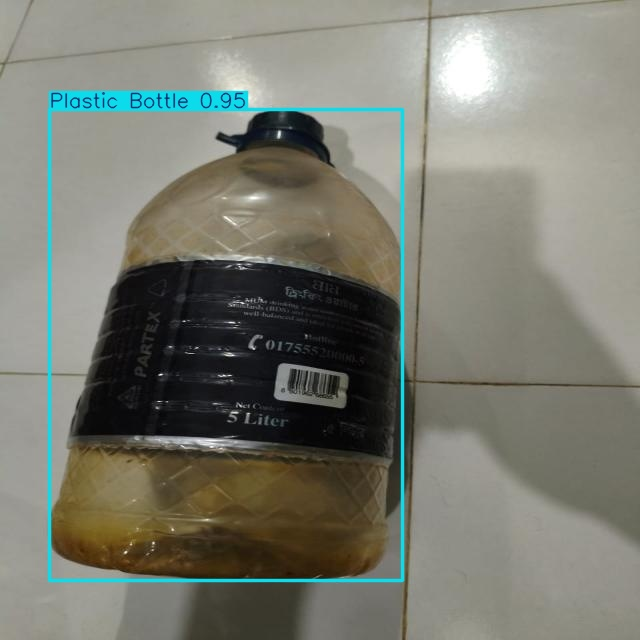

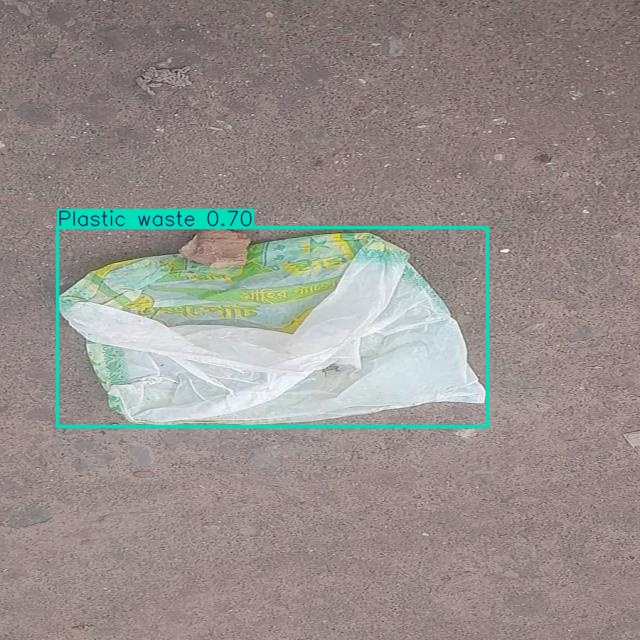

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [33]:
! zip -r yolov8l_recyclablewaste.zip {HOME}/runs/

  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict2/ (stored 0%)
  adding: kaggle/working/runs/detect/predict2/IMG_20250314_153813_jpg.rf.fe5f38570f73aeccb583afc68e50706a.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict2/IMG-20250328-WA0371_jpg.rf.28120c748d2364489fadc7eea5203a4e.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict2/IMG-20250321-WA0050-copy_jpg.rf.f16164dbb087765c0f20399fb5737a11.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict2/IMG-20250403-WA0175_jpg.rf.ae28b34a0c78a3e89a8fc9ac7ac23293.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/predict2/IMG_20250314_154630_jpg.rf.76c3d725b5859b5ce7f7906627205e93.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/predict2/IMG-20250403-WA0507_jpg.rf.38491be343695478cc3fef879eac9be1.jpg (deflated 7%)
  adding: kaggle/working/runs/detect/predict2/IMG-20250328-WA0372_jpg.rf.aded6e72a261105aa273533d74